<a href="https://colab.research.google.com/github/Kome28/DAB_103/blob/main/DAB_103.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Importing Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import pandas as pd
Casualty = pd.read_csv('drive/My Drive/Colab Notebooks/2018_DATA_SA_Casualty.csv')
Crash = pd.read_csv('drive/My Drive/Colab Notebooks/2018_DATA_SA_Crash.csv')
Units = pd.read_csv('drive/My Drive/Colab Notebooks/2018_DATA_SA_Units.csv')

# **Loading Casualty dataset**

In [4]:
Casualty


,REPORT_ID,UND_UNIT_NUMBER,CASUALTY_NUMBER,Casualty Type,Sex,AGE,Position In Veh,Thrown Out,Injury Extent,Seat Belt,Helmet,Hospital
0,2018-4-27/05/2021,1,1,Driver,Male,044,Driver,Not Thrown Out,Treated at Hospital,Fitted - Worn,NaN,XXXXXX
1,2018-4-27/05/2021,1,2,Passenger,Female,037,Rear Seat Right Passenger,Not Thrown Out,Treated at Hospital,Fitted - Worn,NaN,XXXXXX
2,2018-4-27/05/2021,2,1,Driver,Male,034,Driver,Not Thrown Out,Treated at Hospital,Fitted - Worn,NaN,XXXXXX
3,2018-4-27/05/2021,2,2,Passenger,Male,024,Front Seat Left Passenger,Not Thrown Out,Admitted to Hospital,Fitted - Worn,NaN,LYELL MCEWIN
4,2018-5-27/05/2021,1,1,Driver,Female,030,Driver,Not Thrown Out,Treated at Hospital,Fitted - Worn,NaN,XXXXXX
...,...,...,...,...,...,...,...,...,...,...,...,...
6119,2018-13595-27/05/2021,1,1,Driver,Male,030,Driver,Not Thrown Out,By Private,Fitted - Worn,NaN,NaN
6120,2018-13596-27/05/2021,1,1,Driver,Female,059,Driver,Not Thrown Out,By Private,Fitted - Worn,NaN,NaN
6121,2018-13597-27/05/2021,1,1,Driver,Female,021,Driver,Not Thrown Out,By Private,Fitted - Worn,NaN,NaN
6122,2018-13598-27/05/2021,1,1,Driver,Male,062,Driver,Not Thrown Out,Treated at Hospital,Fitted - Worn,NaN,FLINDERS MED CENTRE


# ***Exploring the datatype of dataset***

In [5]:
type(Casualty)

pandas.core.frame.DataFrame

## **Determining the shape of the dataset**

In [6]:
Casualty.shape

(6124, 12)

## **Displaying duplicate records**

In [7]:
duplicate = Casualty.iloc[:,1:13].duplicated()
Casualty.iloc[:,1:13][duplicate]

,UND_UNIT_NUMBER,CASUALTY_NUMBER,Casualty Type,Sex,AGE,Position In Veh,Thrown Out,Injury Extent,Seat Belt,Helmet,Hospital
143,1,1,Driver,Female,029,Driver,Not Thrown Out,By Private,Fitted - Worn,NaN,NaN
146,1,1,Driver,Female,026,Driver,Not Thrown Out,Treated at Hospital,Fitted - Worn,NaN,XXXXXX
212,1,1,Driver,Female,034,Driver,Not Thrown Out,By Private,Fitted - Worn,NaN,NaN
267,2,1,Driver,Female,023,Driver,Not Thrown Out,Treated at Hospital,Fitted - Worn,NaN,XXXXXX
271,1,1,Driver,Female,041,Driver,Not Thrown Out,By Private,Fitted - Worn,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6119,1,1,Driver,Male,030,Driver,Not Thrown Out,By Private,Fitted - Worn,NaN,NaN
6120,1,1,Driver,Female,059,Driver,Not Thrown Out,By Private,Fitted - Worn,NaN,NaN
6121,1,1,Driver,Female,021,Driver,Not Thrown Out,By Private,Fitted - Worn,NaN,NaN
6122,1,1,Driver,Male,062,Driver,Not Thrown Out,Treated at Hospital,Fitted - Worn,NaN,FLINDERS MED CENTRE


## **Displaying the first five rows of the dataset**

In [8]:
Casualty.head()

,REPORT_ID,UND_UNIT_NUMBER,CASUALTY_NUMBER,Casualty Type,Sex,AGE,Position In Veh,Thrown Out,Injury Extent,Seat Belt,Helmet,Hospital
0,2018-4-27/05/2021,1,1,Driver,Male,044,Driver,Not Thrown Out,Treated at Hospital,Fitted - Worn,NaN,XXXXXX
1,2018-4-27/05/2021,1,2,Passenger,Female,037,Rear Seat Right Passenger,Not Thrown Out,Treated at Hospital,Fitted - Worn,NaN,XXXXXX
2,2018-4-27/05/2021,2,1,Driver,Male,034,Driver,Not Thrown Out,Treated at Hospital,Fitted - Worn,NaN,XXXXXX
3,2018-4-27/05/2021,2,2,Passenger,Male,024,Front Seat Left Passenger,Not Thrown Out,Admitted to Hospital,Fitted - Worn,NaN,LYELL MCEWIN
4,2018-5-27/05/2021,1,1,Driver,Female,030,Driver,Not Thrown Out,Treated at Hospital,Fitted - Worn,NaN,XXXXXX


## **Displaying the last five rows of the dataset**

In [9]:
Casualty.tail()

,REPORT_ID,UND_UNIT_NUMBER,CASUALTY_NUMBER,Casualty Type,Sex,AGE,Position In Veh,Thrown Out,Injury Extent,Seat Belt,Helmet,Hospital
6119,2018-13595-27/05/2021,1,1,Driver,Male,030,Driver,Not Thrown Out,By Private,Fitted - Worn,NaN,NaN
6120,2018-13596-27/05/2021,1,1,Driver,Female,059,Driver,Not Thrown Out,By Private,Fitted - Worn,NaN,NaN
6121,2018-13597-27/05/2021,1,1,Driver,Female,021,Driver,Not Thrown Out,By Private,Fitted - Worn,NaN,NaN
6122,2018-13598-27/05/2021,1,1,Driver,Male,062,Driver,Not Thrown Out,Treated at Hospital,Fitted - Worn,NaN,FLINDERS MED CENTRE
6123,2018-13599-27/05/2021,1,1,Driver,Female,057,Driver,Not Thrown Out,By Private,Fitted - Worn,NaN,NaN


## **Displaying the datatype of each column and number of non null values in each column**

In [10]:
Casualty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6124 entries, 0 to 6123
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   REPORT_ID        6124 non-null   object
 1   UND_UNIT_NUMBER  6124 non-null   int64 
 2   CASUALTY_NUMBER  6124 non-null   int64 
 3   Casualty Type    6124 non-null   object
 4   Sex              6124 non-null   object
 5   AGE              6124 non-null   object
 6   Position In Veh  5334 non-null   object
 7   Thrown Out       5753 non-null   object
 8   Injury Extent    6124 non-null   object
 9   Seat Belt        4817 non-null   object
 10  Helmet           1013 non-null   object
 11  Hospital         4624 non-null   object
dtypes: int64(2), object(10)
memory usage: 574.2+ KB


## **Displaying number of unique values in each column**

In [11]:
Casualty.nunique()

REPORT_ID          4953
UND_UNIT_NUMBER       9
CASUALTY_NUMBER       6
Casualty Type         4
Sex                   3
AGE                  97
Position In Veh      13
Thrown Out            2
Injury Extent         4
Seat Belt             7
Helmet                3
Hospital             74
dtype: int64

## **Displaying number of null values in each column**

In [12]:
Casualty.isnull().sum()

REPORT_ID             0
UND_UNIT_NUMBER       0
CASUALTY_NUMBER       0
Casualty Type         0
Sex                   0
AGE                   0
Position In Veh     790
Thrown Out          371
Injury Extent         0
Seat Belt          1307
Helmet             5111
Hospital           1500
dtype: int64

## **Displaying Categorical Variables and their summary statistics**

In [13]:
Casualty.describe(include=['O'])

,REPORT_ID,Casualty Type,Sex,AGE,Position In Veh,Thrown Out,Injury Extent,Seat Belt,Helmet,Hospital
count,6124,6124,6124,6124,5334,5753,6124,4817,1013,4624
unique,4953,4,3,97,13,2,4,7,3,74
top,2018-6762-27/05/2021,Driver,Female,XXX,Driver,Not Thrown Out,Treated at Hospital,Fitted - Worn,Worn,XXXXXX
freq,7,3635,3073,174,3635,4839,4048,4365,964,1292


## **Displaying Continuous Variables and their summary statistics**

In [14]:
Casualty.describe(exclude=['O'])

,UND_UNIT_NUMBER,CASUALTY_NUMBER
count,6124.000000,6124.000000
mean,1.414272,1.145820
std,0.607804,0.449069
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,2.000000,1.000000
max,10.000000,6.000000


## **Displaying the column names**

In [15]:
Casualty.columns

Index(['REPORT_ID', 'UND_UNIT_NUMBER', 'CASUALTY_NUMBER', 'Casualty Type',
       'Sex', 'AGE', 'Position In Veh', 'Thrown Out', 'Injury Extent',
       'Seat Belt', 'Helmet', 'Hospital'],
      dtype='object')

## **Determining overall Correlation between the variables**

In [16]:
Casualty_corr = Casualty.corr()
Casualty_corr

,UND_UNIT_NUMBER,CASUALTY_NUMBER
UND_UNIT_NUMBER,1.000000,-0.033475
CASUALTY_NUMBER,-0.033475,1.000000


## **Plotting a Heatmap to display the correlation**

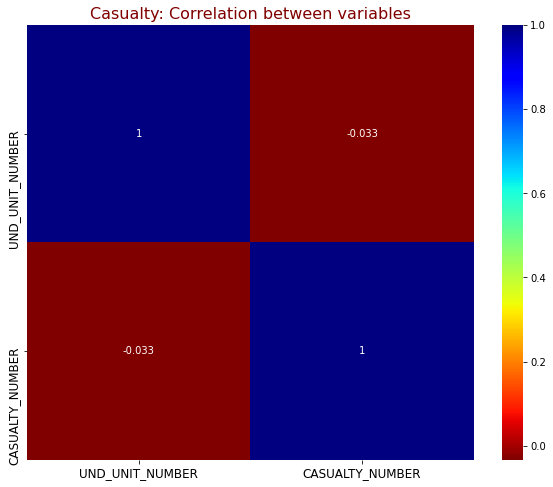

In [17]:
plt.figure(figsize =(10, 8))
sns.heatmap(Casualty_corr, cmap = 'jet_r', annot=True)
plt.title('Casualty: Correlation between variables' , color = 'maroon' , fontsize = 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

 ## **Exploring outliers in Casualty Dataset**

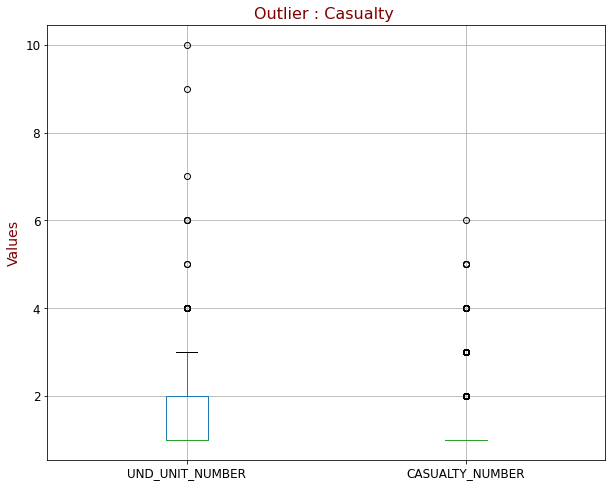

In [18]:
plt.figure(figsize = (10,8))
Casualty.boxplot()
plt.title('Outlier : Casualty ' ,color = 'maroon', fontsize=16 )
plt.ylabel('Values' ,color = 'maroon', fontsize=14 )
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## **Plot for exploring the Count of records for each Casualty Type**

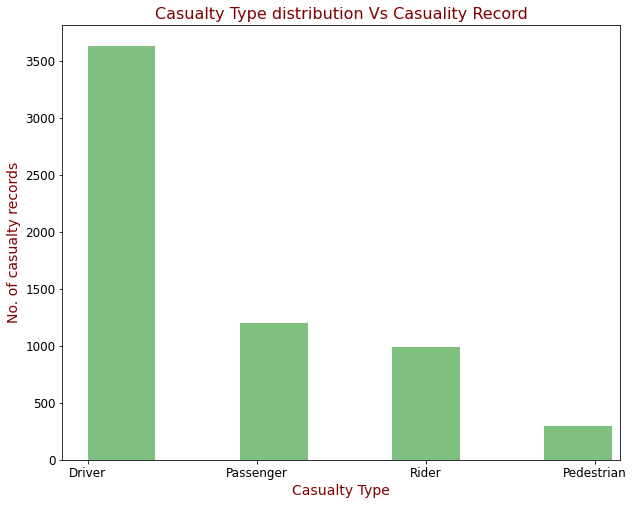

In [19]:
plt.figure(figsize=[10,8])
plt.hist(Casualty['Casualty Type'] , color ='Green',width = 0.4 , alpha = 0.5 )
 
plt.xlabel("Casualty Type" , color = 'maroon', fontsize=14)
plt.ylabel("No. of casualty records", color = 'maroon', fontsize=14)
plt.title("Casualty Type distribution Vs Casuality Record" , color = 'maroon', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## **Displaying the number of each unique value under Gender**

In [20]:
Casualty.Sex.value_counts()

Female     3073
Male       3037
Unknown      14
Name: Sex, dtype: int64

## **Plot for exploring the Count of Records found for each Gender**

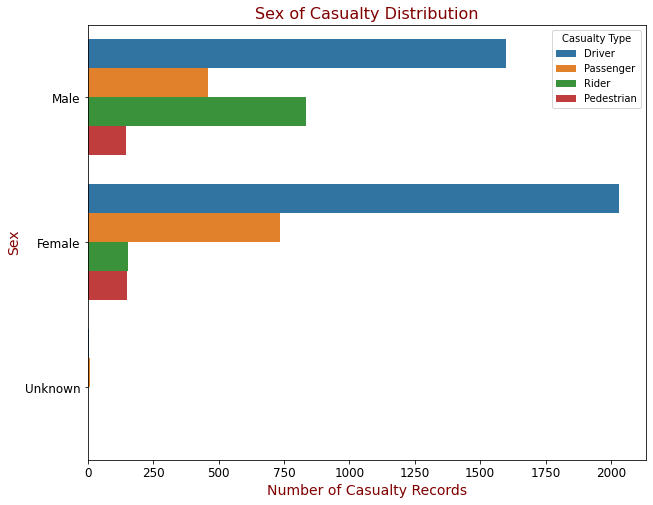

In [21]:
plt.figure(figsize=[10,8])

sns.countplot(data = Casualty , y = 'Sex' , hue = 'Casualty Type')
plt.ylabel("Sex" , color = 'maroon', fontsize=14)
plt.xlabel("Number of Casualty Records" ,color = 'maroon', fontsize=14)
plt.title("Sex of Casualty Distribution" , color = 'maroon', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## **Displaying the Number of Casualty record based on Position of the Injured Person in the Vehicle**

In [22]:
Casualty['Position In Veh'].value_counts()

Driver                                  3635
Front Seat Left Passenger                733
Rider of Motorcycle                      498
Rear Seat Left Passenger                 190
Rear Seat Right Passenger                170
Rear Seat Middle Passenger                57
Unknown                                   18
Passenger of Motorcycle                   17
Passenger on Multi-Passenger Vehicle       8
Other                                      3
Back of Enclosed Van                       2
Front Seat Middle Passenger                2
Back Open Utility or Truck                 1
Name: Position In Veh, dtype: int64

## **Plot for exploring the Count of Casualty against their position in the Vehicle**

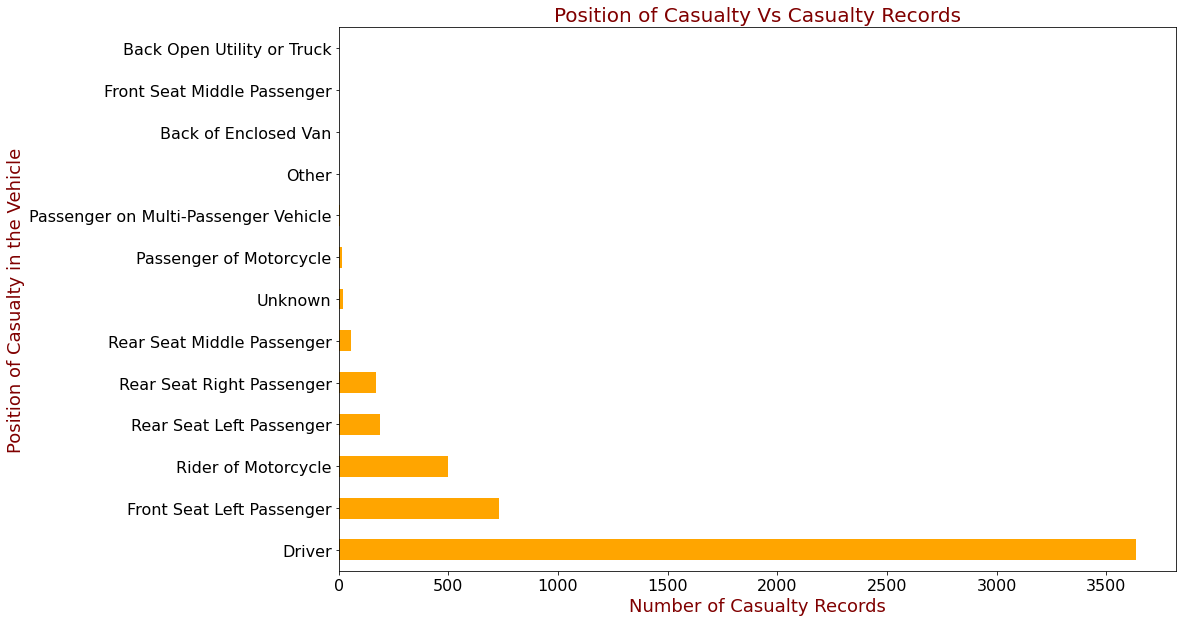

In [23]:
Casualty['Position In Veh'].value_counts().plot(kind='barh' ,color = 'Orange', figsize=(15, 10) )
plt.xlabel("Number of Casualty Records" , color = 'maroon' ,fontsize = 18 )
plt.ylabel("Position of Casualty in the Vehicle" , color = 'maroon'  , fontsize = 18)
plt.title("Position of Casualty Vs Casualty Records" , color = 'maroon' , fontsize = 20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## **Exploring the Number of Casualty records against Thrown Out variable**

In [24]:
Casualty['Thrown Out'].value_counts()

Not Thrown Out    4839
Thrown Out         914
Name: Thrown Out, dtype: int64

## **Exploring the Count of Casualty records in which the person was Thrown Out from the Vehicle during the crash**

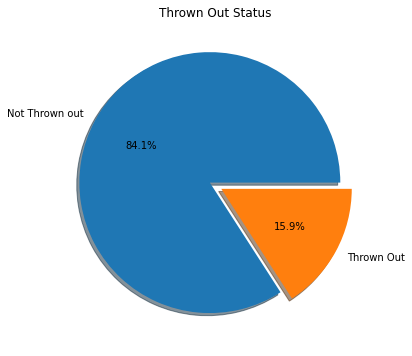

In [25]:
Casualty['Thrown Out'].value_counts().plot(kind='pie',title='Thrown Out Status',
                                      autopct='%1.1f%%', labels= ['Not Thrown out', 'Thrown Out'],
                                      explode=(0.05, 0.05), 
                                      ylabel=" " ,
                                      shadow=True , figsize=(8, 6))

plt.show()

## **Displaying the Number of Casualty record against Injury extent variable**

In [26]:
Casualty['Injury Extent'].value_counts()

Treated at Hospital     4048
By Private              1420
Admitted to Hospital     576
Fatal                     80
Name: Injury Extent, dtype: int64

## **Plot for exploring the Count of Casualty records against Injury Extent in the person**

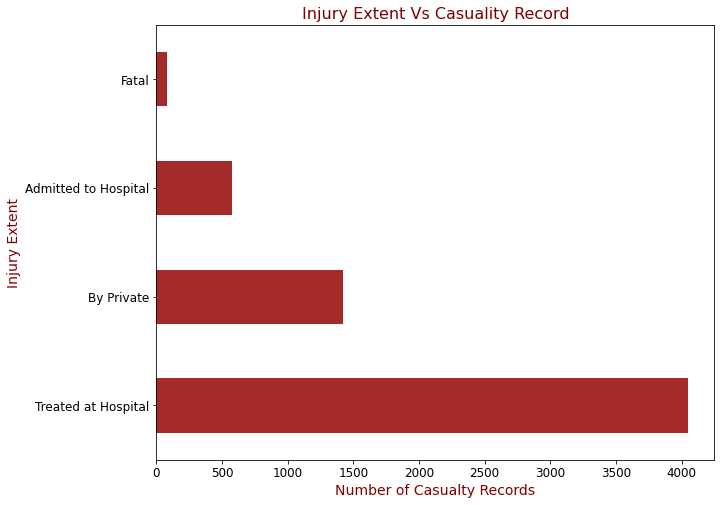

In [27]:
Casualty['Injury Extent'].value_counts().plot(kind='barh',color = 'brown', figsize=(10, 8))
plt.ylabel("Injury Extent" , color = 'maroon'  , fontsize = 14)
plt.xlabel("Number of Casualty Records" ,  color = 'maroon'  , fontsize = 14)
plt.title("Injury Extent Vs Casuality Record" , color = 'maroon'  , fontsize = 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## **Displaying the Number of Casualty record against Seat Belt status**

In [28]:
Casualty['Seat Belt'].value_counts()

Fitted - Worn                 4365
Fitted - Unknown if Worn       298
Fitted - Not Worn               94
Child Restraint - Worn          51
Not Fitted                       5
Child Restraint - Not Worn       3
Not Applicable                   1
Name: Seat Belt, dtype: int64

## **Displaying the Number of Casualty records against Helmet Status variable**

In [29]:
Casualty.Helmet.value_counts()

Worn        964
Unknown      29
Not Worn     20
Name: Helmet, dtype: int64

## **Displaying the Number of Casualty records against Hospital variable**

In [30]:
Casualty.Hospital.value_counts()

XXXXXX                    1292
ROYAL ADELAIDE             949
FLINDERS MED CENTRE        587
LYELL MCEWIN               503
MODBURY                    230
                          ... 
CUMMINS                      1
WALLAROO                     1
CALVARY NORTH ADELAIDE       1
QUORN                        1
PENOLA                       1
Name: Hospital, Length: 74, dtype: int64

# ***Loading the Crash Dataset***

In [31]:
Crash

,REPORT_ID,Stats Area,Suburb,Postcode,LGA Name,Total Units,Total Cas,Total Fats,Total SI,Total MI,Year,Month,Day,Time,Area Speed,Position Type,Horizontal Align,Vertical Align,Other Feat,Road Surface,Moisture Cond,Weather Cond,DayNight,Crash Type,Unit Resp,Entity Code,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved,ACCLOC_X,ACCLOC_Y,UNIQUE_LOC
0,2018-1-27/05/2021,2 Metropolitan,MITCHELL PARK,5043,CC MARION.,4,0,0,0,0,2018,October,Wednesday,11:20 am,60,Divided Road,Straight road,Level,Driveway or Entrance,Sealed,Dry,Not Raining,Daylight,Right Angle,2,Driver Rider,1: PDO,No Control,NaN,NaN,1324362.05,1662130.48,1.324362e+13
1,2018-2-27/05/2021,2 Metropolitan,GLANVILLE,5015,CITY OF PORT ADELAIDE ENFIELD,2,0,0,0,0,2018,January,Monday,12:45 am,60,Divided Road,Straight road,Level,"Bridge, Culvert, Causeway",Sealed,Dry,Not Raining,Night,Rear End,2,Driver Rider,1: PDO,No Control,NaN,NaN,1319117.45,1679740.62,1.319117e+13
2,2018-3-27/05/2021,2 Metropolitan,GOLDEN GROVE,5125,CITY OF TEA TREE GULLY,2,0,0,0,0,2018,January,Monday,02:14 am,60,Cross Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Right Angle,1,Driver Rider,1: PDO,Traffic Signals,NaN,NaN,1337889.71,1685361.47,1.337890e+13
3,2018-4-27/05/2021,2 Metropolitan,ELIZABETH SOUTH,5112,CITY OF PLAYFORD.,2,4,0,1,3,2018,January,Monday,02:26 am,60,Cross Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Right Turn,1,Driver Rider,3: SI,Traffic Signals,NaN,NaN,1334568.88,1691271.22,1.334569e+13
4,2018-5-27/05/2021,2 Metropolitan,CROYDON,5008,CITY OF CHARLES STURT,2,3,0,0,3,2018,January,Monday,04:00 am,60,Cross Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Right Turn,2,Driver Rider,2: MI,Traffic Signals,NaN,NaN,1325517.03,1673428.59,1.325517e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,2018-13595-27/05/2021,1 City,ADELAIDE,5000,CITY OF ADELAIDE,2,1,0,0,1,2018,December,Thursday,01:49 am,60,Cross Road,Straight road,Level,Not Applicable,Sealed,Wet,Raining,Night,Rear End,2,Driver Rider,2: MI,Traffic Signals,NaN,NaN,1327363.85,1670321.47,1.327364e+13
13595,2018-13596-27/05/2021,2 Metropolitan,GAWLER,5118,CT GAWLER.,2,1,0,0,1,2018,September,Friday,02:00 pm,50,Cross Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Rear End,2,Driver Rider,2: MI,Traffic Signals,NaN,NaN,1343262.87,1705915.87,1.343263e+13
13596,2018-13597-27/05/2021,1 City,ADELAIDE,5000,CITY OF ADELAIDE,2,1,0,0,1,2018,September,Saturday,05:30 pm,50,Cross Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Right Angle,2,Driver Rider,2: MI,Traffic Signals,NaN,NaN,1329570.16,1670701.85,1.329570e+13
13597,2018-13598-27/05/2021,2 Metropolitan,MORPHETT VALE,5162,CITY OF ONKAPARINGA,2,1,0,0,1,2018,August,Tuesday,12:28 pm,60,T-Junction,Straight road,Slope,Not Applicable,Sealed,Dry,Not Raining,Daylight,Rear End,2,Driver Rider,2: MI,No Control,NaN,NaN,1319635.51,1648902.71,1.319636e+13


## **Exploring the datatype of dataset**

In [32]:
type(Crash)

pandas.core.frame.DataFrame

## **Displaying the first five rows of the dataset**

In [33]:
Crash.head()

,REPORT_ID,Stats Area,Suburb,Postcode,LGA Name,Total Units,Total Cas,Total Fats,Total SI,Total MI,Year,Month,Day,Time,Area Speed,Position Type,Horizontal Align,Vertical Align,Other Feat,Road Surface,Moisture Cond,Weather Cond,DayNight,Crash Type,Unit Resp,Entity Code,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved,ACCLOC_X,ACCLOC_Y,UNIQUE_LOC
0,2018-1-27/05/2021,2 Metropolitan,MITCHELL PARK,5043,CC MARION.,4,0,0,0,0,2018,October,Wednesday,11:20 am,60,Divided Road,Straight road,Level,Driveway or Entrance,Sealed,Dry,Not Raining,Daylight,Right Angle,2,Driver Rider,1: PDO,No Control,NaN,NaN,1324362.05,1662130.48,1.324362e+13
1,2018-2-27/05/2021,2 Metropolitan,GLANVILLE,5015,CITY OF PORT ADELAIDE ENFIELD,2,0,0,0,0,2018,January,Monday,12:45 am,60,Divided Road,Straight road,Level,"Bridge, Culvert, Causeway",Sealed,Dry,Not Raining,Night,Rear End,2,Driver Rider,1: PDO,No Control,NaN,NaN,1319117.45,1679740.62,1.319117e+13
2,2018-3-27/05/2021,2 Metropolitan,GOLDEN GROVE,5125,CITY OF TEA TREE GULLY,2,0,0,0,0,2018,January,Monday,02:14 am,60,Cross Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Right Angle,1,Driver Rider,1: PDO,Traffic Signals,NaN,NaN,1337889.71,1685361.47,1.337890e+13
3,2018-4-27/05/2021,2 Metropolitan,ELIZABETH SOUTH,5112,CITY OF PLAYFORD.,2,4,0,1,3,2018,January,Monday,02:26 am,60,Cross Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Right Turn,1,Driver Rider,3: SI,Traffic Signals,NaN,NaN,1334568.88,1691271.22,1.334569e+13
4,2018-5-27/05/2021,2 Metropolitan,CROYDON,5008,CITY OF CHARLES STURT,2,3,0,0,3,2018,January,Monday,04:00 am,60,Cross Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Right Turn,2,Driver Rider,2: MI,Traffic Signals,NaN,NaN,1325517.03,1673428.59,1.325517e+13


## **Displaying the last five rows of the dataset**

In [34]:
Crash.tail()

,REPORT_ID,Stats Area,Suburb,Postcode,LGA Name,Total Units,Total Cas,Total Fats,Total SI,Total MI,Year,Month,Day,Time,Area Speed,Position Type,Horizontal Align,Vertical Align,Other Feat,Road Surface,Moisture Cond,Weather Cond,DayNight,Crash Type,Unit Resp,Entity Code,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved,ACCLOC_X,ACCLOC_Y,UNIQUE_LOC
13594,2018-13595-27/05/2021,1 City,ADELAIDE,5000,CITY OF ADELAIDE,2,1,0,0,1,2018,December,Thursday,01:49 am,60,Cross Road,Straight road,Level,Not Applicable,Sealed,Wet,Raining,Night,Rear End,2,Driver Rider,2: MI,Traffic Signals,NaN,NaN,1327363.85,1670321.47,1.327364e+13
13595,2018-13596-27/05/2021,2 Metropolitan,GAWLER,5118,CT GAWLER.,2,1,0,0,1,2018,September,Friday,02:00 pm,50,Cross Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Rear End,2,Driver Rider,2: MI,Traffic Signals,NaN,NaN,1343262.87,1705915.87,1.343263e+13
13596,2018-13597-27/05/2021,1 City,ADELAIDE,5000,CITY OF ADELAIDE,2,1,0,0,1,2018,September,Saturday,05:30 pm,50,Cross Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Right Angle,2,Driver Rider,2: MI,Traffic Signals,NaN,NaN,1329570.16,1670701.85,1.329570e+13
13597,2018-13598-27/05/2021,2 Metropolitan,MORPHETT VALE,5162,CITY OF ONKAPARINGA,2,1,0,0,1,2018,August,Tuesday,12:28 pm,60,T-Junction,Straight road,Slope,Not Applicable,Sealed,Dry,Not Raining,Daylight,Rear End,2,Driver Rider,2: MI,No Control,NaN,NaN,1319635.51,1648902.71,1.319636e+13
13598,2018-13599-27/05/2021,2 Metropolitan,PARKSIDE,5063,CITY OF UNLEY,2,1,0,0,1,2018,November,Wednesday,05:11 pm,60,Cross Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Rear End,2,Driver Rider,2: MI,Traffic Signals,NaN,NaN,1330707.08,1668319.59,1.330707e+13


## **Exploring the shape of the dataset**

In [35]:
Crash.shape

(13599, 33)

In [36]:
Crash.shape[0]

13599

In [37]:
Crash.shape[1]

33

## **Displaying the column names**

In [38]:
Crash.columns

Index(['REPORT_ID', 'Stats Area', 'Suburb', 'Postcode', 'LGA Name',
       'Total Units', 'Total Cas', 'Total Fats', 'Total SI', 'Total MI',
       'Year', 'Month', 'Day', 'Time', 'Area Speed', 'Position Type',
       'Horizontal Align', 'Vertical Align', 'Other Feat', 'Road Surface',
       'Moisture Cond', 'Weather Cond', 'DayNight', 'Crash Type', 'Unit Resp',
       'Entity Code', 'CSEF Severity', 'Traffic Ctrls', 'DUI Involved',
       'Drugs Involved', 'ACCLOC_X', 'ACCLOC_Y', 'UNIQUE_LOC'],
      dtype='object')

## **Checking duplicate records**

In [39]:
duplicate=Crash.iloc[:,1:34].duplicated()
Crash.iloc[:,1:34][duplicate]

,Stats Area,Suburb,Postcode,LGA Name,Total Units,Total Cas,Total Fats,Total SI,Total MI,Year,Month,Day,Time,Area Speed,Position Type,Horizontal Align,Vertical Align,Other Feat,Road Surface,Moisture Cond,Weather Cond,DayNight,Crash Type,Unit Resp,Entity Code,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved,ACCLOC_X,ACCLOC_Y,UNIQUE_LOC
7876,2 Metropolitan,ADELAIDE,5000,CITY OF UNLEY,2,0,0,0,0,2018,August,Friday,01:05 pm,60,Divided Road,Straight road,Level,Not Applicable,Sealed,Wet,Raining,Daylight,Rear End,1,Driver Rider,1: PDO,No Control,NaN,NaN,1328831.99,1668974.81,1.328832e+13


## **Displaying the datatype of each column and number of non null values in each column**

In [40]:
Crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13599 entries, 0 to 13598
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   REPORT_ID         13599 non-null  object 
 1   Stats Area        13599 non-null  object 
 2   Suburb            13599 non-null  object 
 3   Postcode          13599 non-null  int64  
 4   LGA Name          13488 non-null  object 
 5   Total Units       13599 non-null  int64  
 6   Total Cas         13599 non-null  int64  
 7   Total Fats        13599 non-null  int64  
 8   Total SI          13599 non-null  int64  
 9   Total MI          13599 non-null  int64  
 10  Year              13599 non-null  int64  
 11  Month             13599 non-null  object 
 12  Day               13599 non-null  object 
 13  Time              13599 non-null  object 
 14  Area Speed        13599 non-null  int64  
 15  Position Type     13599 non-null  object 
 16  Horizontal Align  13599 non-null  object

## **Displaying number of null values in each column**

In [41]:
Crash.isnull().sum()

REPORT_ID               0
Stats Area              0
Suburb                  0
Postcode                0
LGA Name              111
Total Units             0
Total Cas               0
Total Fats              0
Total SI                0
Total MI                0
Year                    0
Month                   0
Day                     0
Time                    0
Area Speed              0
Position Type           0
Horizontal Align        0
Vertical Align          0
Other Feat              0
Road Surface            0
Moisture Cond           0
Weather Cond            0
DayNight                0
Crash Type              0
Unit Resp               0
Entity Code             0
CSEF Severity           0
Traffic Ctrls           0
DUI Involved        13117
Drugs Involved      13271
ACCLOC_X                3
ACCLOC_Y                3
UNIQUE_LOC              3
dtype: int64

## **Displaying the number of unique values against each column**

In [42]:
Crash.nunique()

REPORT_ID           13599
Stats Area              3
Suburb               1076
Postcode              320
LGA Name               69
Total Units            11
Total Cas               8
Total Fats              3
Total SI                5
Total MI                8
Year                    1
Month                  12
Day                     7
Time                 1132
Area Speed             14
Position Type          16
Horizontal Align        4
Vertical Align          5
Other Feat              9
Road Surface            3
Moisture Cond           3
Weather Cond            3
DayNight                2
Crash Type             13
Unit Resp               3
Entity Code             5
CSEF Severity           4
Traffic Ctrls           9
DUI Involved            1
Drugs Involved          1
ACCLOC_X            11180
ACCLOC_Y            11196
UNIQUE_LOC          11196
dtype: int64

## **Determining overall Correlation between the variables**

In [43]:
Crash_corr = Crash.corr()
Crash_corr

,Postcode,Total Units,Total Cas,Total Fats,Total SI,Total MI,Year,Area Speed,Unit Resp,ACCLOC_X,ACCLOC_Y,UNIQUE_LOC
Postcode,1.000000,-0.093108,0.035440,0.067140,0.081090,0.000994,NaN,0.284956,-0.035759,0.099002,0.008202,0.099002
Total Units,-0.093108,1.000000,0.038944,-0.018963,0.004098,0.042274,NaN,-0.098269,-0.083477,0.048591,-0.097661,0.048591
Total Cas,0.035440,0.038944,1.000000,0.134185,0.320804,0.933682,NaN,0.104069,-0.011788,-0.015572,0.026934,-0.015572
Total Fats,0.067140,-0.018963,0.134185,1.000000,0.080646,-0.008457,NaN,0.104169,-0.019488,0.009475,0.019403,0.009476
Total SI,0.081090,0.004098,0.320804,0.080646,1.000000,-0.019505,NaN,0.134237,-0.030484,0.004410,0.045422,0.004410
Total MI,0.000994,0.042274,0.933682,-0.008457,-0.019505,1.000000,NaN,0.050746,0.000551,-0.019256,0.010317,-0.019256
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area Speed,0.284956,-0.098269,0.104069,0.104169,0.134237,0.050746,NaN,1.000000,-0.050558,-0.009470,0.142961,-0.009470
Unit Resp,-0.035759,-0.083477,-0.011788,-0.019488,-0.030484,0.000551,NaN,-0.050558,1.000000,-0.000742,-0.010272,-0.000742
ACCLOC_X,0.099002,0.048591,-0.015572,0.009475,0.004410,-0.019256,NaN,-0.009470,-0.000742,1.000000,-0.643793,1.000000


## **Plotting a Heatmap to display the correlation**

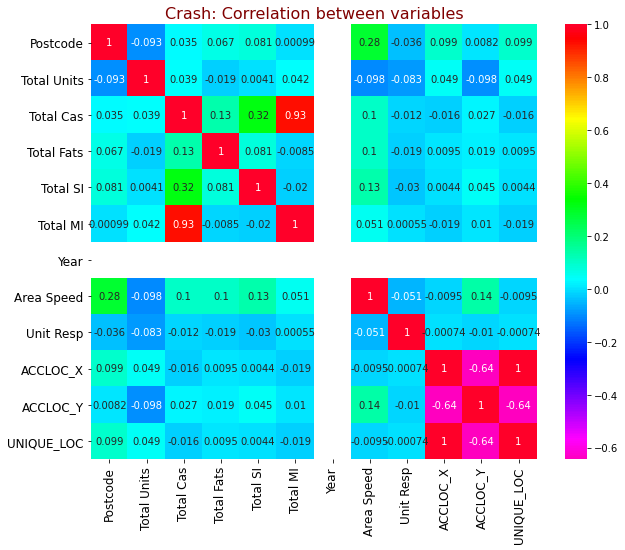

In [44]:
plt.figure(figsize =(10, 8))
sns.heatmap(Crash_corr, cmap = 'gist_rainbow_r',annot=True)
plt.title('Crash: Correlation between variables' , color = 'maroon' , fontsize = 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

 ## **Exploring outliers in Crash Dataset**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


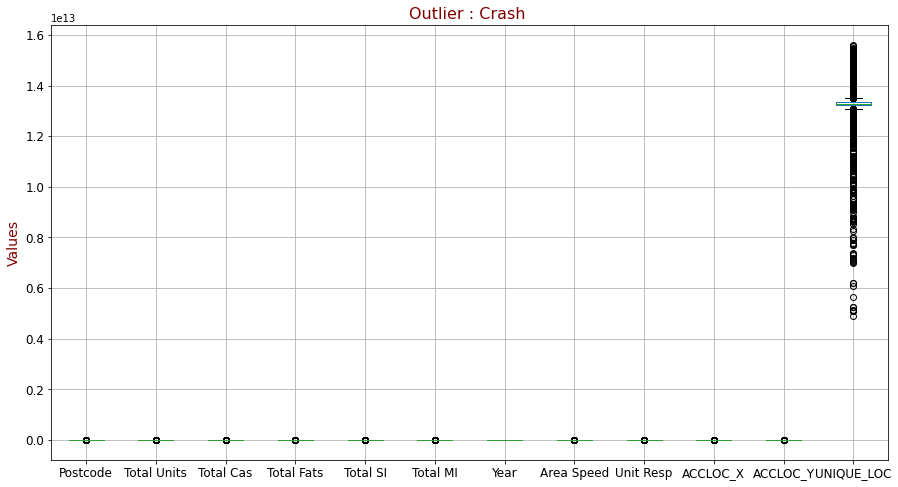

In [45]:
plt.figure(figsize = (15,8))
Crash.boxplot()
plt.title('Outlier : Crash ' ,color = 'maroon', fontsize=16 )
plt.ylabel('Values' ,color = 'maroon', fontsize=14 )
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

##  **Displaying Categorical Variables and their summary statistics**

In [46]:
Crash.describe(include=['O'])

,REPORT_ID,Stats Area,Suburb,LGA Name,Month,Day,Time,Position Type,Horizontal Align,Vertical Align,Other Feat,Road Surface,Moisture Cond,Weather Cond,DayNight,Crash Type,Entity Code,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved
count,13599,13599,13599,13488,13599,13599,13599,13599,13599,13599,13599,13599,13599,13599,13599,13599,13599,13599,13599,482,328
unique,13599,3,1076,69,12,7,1132,16,4,5,9,3,3,3,2,13,5,4,9,1,1
top,2018-5417-27/05/2021,2 Metropolitan,ADELAIDE,CITY OF PORT ADELAIDE ENFIELD,August,Thursday,04:00 pm,Not Divided,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Rear End,Driver Rider,1: PDO,No Control,Y,Y
freq,1,10854,561,1319,1283,2248,178,4552,11829,11557,12367,13251,11885,12366,10464,3578,13075,8646,9308,482,328


## **Displaying Continuous Variables and their summary statistics**

In [47]:
Crash.describe(exclude=['O'])

,Postcode,Total Units,Total Cas,Total Fats,Total SI,Total MI,Year,Area Speed,Unit Resp,ACCLOC_X,ACCLOC_Y,UNIQUE_LOC
count,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.000000,13599.0,13599.000000,13599.000000,1.359600e+04,1.359600e+04,1.359600e+04
mean,5123.667108,2.134936,0.450327,0.005883,0.042356,0.402088,2018.0,64.091477,1.478565,1.330533e+06,1.677600e+06,1.330533e+13
std,200.831506,0.563734,0.702264,0.081142,0.231636,0.660896,0.0,16.989135,0.850387,5.888001e+04,8.067716e+04,5.888001e+11
min,511.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2018.0,5.000000,1.000000,4.899372e+05,1.315050e+06,4.899372e+12
25%,5042.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2018.0,50.000000,1.000000,1.324136e+06,1.664888e+06,1.324136e+13
50%,5086.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2018.0,60.000000,1.000000,1.328946e+06,1.673329e+06,1.328946e+13
75%,5158.000000,2.000000,1.000000,0.000000,0.000000,1.000000,2018.0,60.000000,2.000000,1.334799e+06,1.682849e+06,1.334798e+13
max,5950.000000,11.000000,7.000000,2.000000,4.000000,7.000000,2018.0,110.000000,9.000000,1.561252e+06,2.649175e+06,1.561252e+13


## **Determining overall Correlation between the variables**

In [48]:
Crash.corr()

,Postcode,Total Units,Total Cas,Total Fats,Total SI,Total MI,Year,Area Speed,Unit Resp,ACCLOC_X,ACCLOC_Y,UNIQUE_LOC
Postcode,1.000000,-0.093108,0.035440,0.067140,0.081090,0.000994,NaN,0.284956,-0.035759,0.099002,0.008202,0.099002
Total Units,-0.093108,1.000000,0.038944,-0.018963,0.004098,0.042274,NaN,-0.098269,-0.083477,0.048591,-0.097661,0.048591
Total Cas,0.035440,0.038944,1.000000,0.134185,0.320804,0.933682,NaN,0.104069,-0.011788,-0.015572,0.026934,-0.015572
Total Fats,0.067140,-0.018963,0.134185,1.000000,0.080646,-0.008457,NaN,0.104169,-0.019488,0.009475,0.019403,0.009476
Total SI,0.081090,0.004098,0.320804,0.080646,1.000000,-0.019505,NaN,0.134237,-0.030484,0.004410,0.045422,0.004410
Total MI,0.000994,0.042274,0.933682,-0.008457,-0.019505,1.000000,NaN,0.050746,0.000551,-0.019256,0.010317,-0.019256
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area Speed,0.284956,-0.098269,0.104069,0.104169,0.134237,0.050746,NaN,1.000000,-0.050558,-0.009470,0.142961,-0.009470
Unit Resp,-0.035759,-0.083477,-0.011788,-0.019488,-0.030484,0.000551,NaN,-0.050558,1.000000,-0.000742,-0.010272,-0.000742
ACCLOC_X,0.099002,0.048591,-0.015572,0.009475,0.004410,-0.019256,NaN,-0.009470,-0.000742,1.000000,-0.643793,1.000000


## **Determining datatype of a particular column**

In [49]:
month = Crash['Month']
month
type(month)

pandas.core.series.Series

## **Grouping the Crash records reported in each month**

In [50]:
Crash.groupby(['Month']).size()

Month
April        1101
August       1283
December     1049
February     1075
January       956
July         1089
June         1112
March        1237
May          1222
November     1139
October      1183
September    1153
dtype: int64

## **Exploring the Number of Crashes in a particular Month i.e. March**

In [51]:
Months=Crash[Crash.Month =='March']
Months

,REPORT_ID,Stats Area,Suburb,Postcode,LGA Name,Total Units,Total Cas,Total Fats,Total SI,Total MI,Year,Month,Day,Time,Area Speed,Position Type,Horizontal Align,Vertical Align,Other Feat,Road Surface,Moisture Cond,Weather Cond,DayNight,Crash Type,Unit Resp,Entity Code,CSEF Severity,Traffic Ctrls,DUI Involved,Drugs Involved,ACCLOC_X,ACCLOC_Y,UNIQUE_LOC
1995,2018-1996-27/05/2021,3 Country,MOUNT GAMBIER,5290,CC MT.GAMBIER.,1,0,0,0,0,2018,March,Thursday,01:23 am,60,Cross Road,Straight road,Level,Not Applicable,Sealed,Wet,Raining,Night,Left Road - Out of Control,1,Driver Rider,1: PDO,Roundabout,NaN,NaN,1508779.68,1341470.69,1.508780e+13
1996,2018-1997-27/05/2021,2 Metropolitan,SEATON,5023,CITY OF CHARLES STURT,2,0,0,0,0,2018,March,Thursday,12:50 am,50,T-Junction,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Hit Parked Vehicle,1,Driver Rider,1: PDO,No Control,NaN,NaN,1321082.12,1674232.01,1.321082e+13
1997,2018-1998-27/05/2021,2 Metropolitan,SOUTH PLYMPTON,5038,CC MARION.,3,1,0,0,1,2018,March,Thursday,01:30 am,60,Divided Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Hit Fixed Object,1,Driver Rider,2: MI,No Control,NaN,Y,1324243.88,1665926.37,1.324244e+13
1998,2018-1999-27/05/2021,2 Metropolitan,SEMAPHORE,5019,CITY OF PORT ADELAIDE ENFIELD,3,2,0,1,1,2018,March,Thursday,06:19 am,50,T-Junction,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Night,Roll Over,1,Driver Rider,3: SI,Roundabout,NaN,NaN,1317796.67,1680437.55,1.317797e+13
1999,2018-2000-27/05/2021,2 Metropolitan,MODBURY,5092,CITY OF TEA TREE GULLY,2,0,0,0,0,2018,March,Thursday,08:14 am,50,Not Divided,Straight road,Slope,Not Applicable,Sealed,Dry,Not Raining,Daylight,Right Angle,2,Driver Rider,1: PDO,No Control,NaN,NaN,1335127.61,1680776.79,1.335128e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4912,2018-4913-27/05/2021,2 Metropolitan,GLENELG NORTH,5045,CITY OF HOLDFAST BAY,2,0,0,0,0,2018,March,Friday,11:00 am,50,Not Divided,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Rear End,2,Driver Rider,1: PDO,No Control,NaN,NaN,1320887.27,1665534.72,1.320887e+13
5759,2018-5760-27/05/2021,2 Metropolitan,TORRENSVILLE,5031,CITY OF WEST TORRENS,2,0,0,0,0,2018,March,Sunday,11:45 am,60,Cross Road,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Rear End,2,Driver Rider,1: PDO,Traffic Signals,NaN,NaN,1325436.20,1672006.42,1.325436e+13
6611,2018-6612-27/05/2021,2 Metropolitan,WOODVILLE,5011,CITY OF CHARLES STURT,2,2,0,0,2,2018,March,Monday,11:00 am,60,Divided Road,Straight road,Level,Driveway or Entrance,Sealed,Dry,Not Raining,Daylight,Rear End,2,Driver Rider,2: MI,No Control,NaN,NaN,1322306.24,1676269.70,1.322306e+13
6843,2018-6844-27/05/2021,2 Metropolitan,WEST LAKES SHORE,5020,CITY OF CHARLES STURT,2,1,0,0,1,2018,March,Friday,03:30 pm,50,T-Junction,Straight road,Level,Not Applicable,Sealed,Dry,Not Raining,Daylight,Right Angle,2,Driver Rider,2: MI,No Control,NaN,NaN,1318602.18,1678165.57,1.318602e+13


## **Sorting the Total Casualty according to the Number of Crashes reported**

In [52]:
Crash['Total Cas'].value_counts().sort_index()

0    8646
1    4117
2     613
3     148
4      51
5      13
6       9
7       2
Name: Total Cas, dtype: int64

## **Summary statistics of Total casualty column in Road Crash**

In [53]:
Crash['Total Cas'].describe()

count    13599.000000
mean         0.450327
std          0.702264
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          7.000000
Name: Total Cas, dtype: float64

In [54]:
Crash['Total Cas'].mean()

0.4503272299433782

## **Plot displaying the Total Number of Crashes per Month**

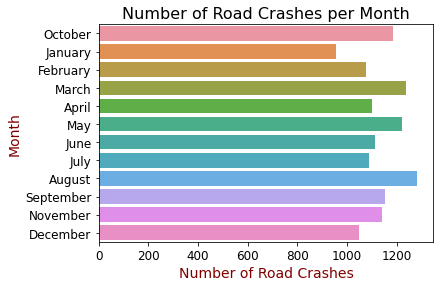

In [55]:
sns.countplot(data = Crash , y = 'Month' )
plt.ylabel("Month" , color = 'maroon'  , fontsize = 14)
plt.xlabel("Number of Road Crashes" ,  color = 'maroon'  , fontsize = 14)
plt.title("Number of Road Crashes per Month"  , fontsize = 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## **Plot displaying the Total Number of Casualties against the Number of Crash Records**

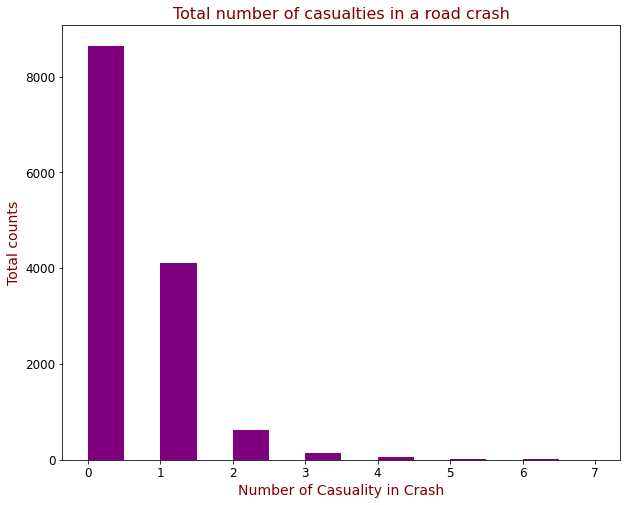

In [56]:
plt.figure(figsize = (10,8))
plt.hist(Crash['Total Cas'],bins=14, color = 'Purple')
plt.xlabel('Number of Casuality in Crash' ,color = 'maroon', fontsize=14)
plt.ylabel('Total counts' ,color = 'maroon', fontsize=14 )
plt.title('Total number of casualties in a road crash' ,color = 'maroon', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## **Plot displaying relationship between Speed and Total Number of Casualty**

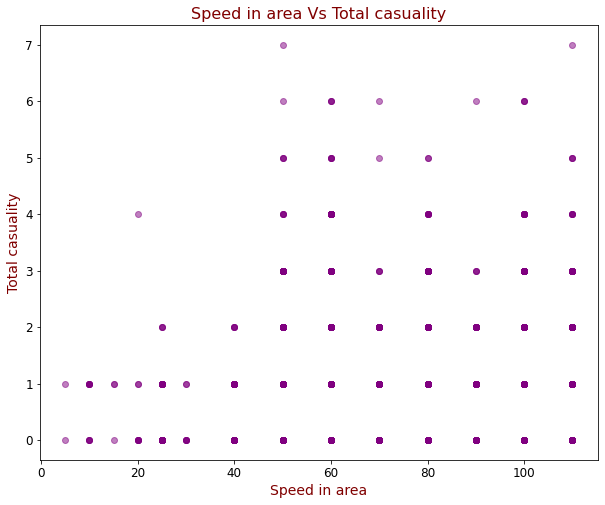

In [57]:
plt.figure(figsize = (10,8))

areaspeed= Crash['Area Speed']
totalcas=Crash['Total Cas']
plt.plot(areaspeed,totalcas,'o',alpha=0.5, color = 'Purple')
plt.xlabel('Speed in area' ,color = 'maroon', fontsize=14)
plt.ylabel('Total casuality' ,color = 'maroon', fontsize=14)
plt.title('Speed in area Vs Total casuality',color = 'maroon', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## **Kernel Density Estimation on Area Speed**

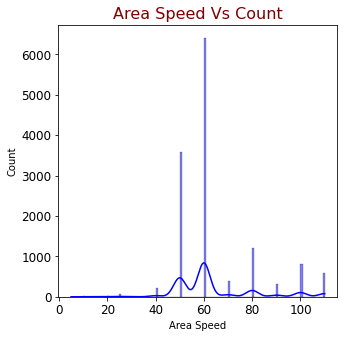

In [58]:
plt.figure(figsize = (5,5))
sns.histplot(Crash['Area Speed'], kde = True, color = 'Blue')
plt.title('Area Speed Vs Count' ,color = 'maroon', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## **Plot displaying distribution of Area Speed on each day**

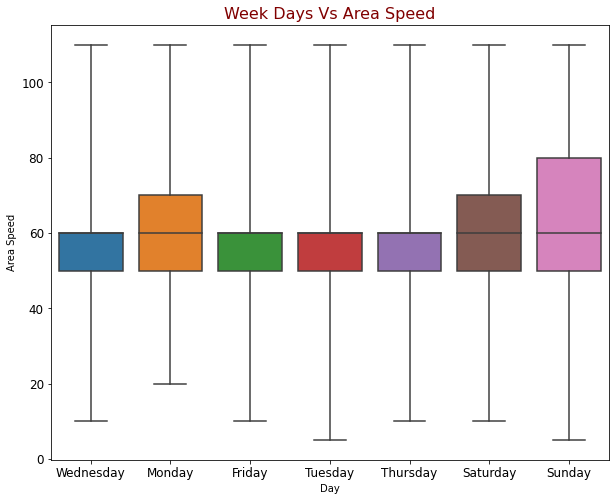

In [59]:
plt.figure(figsize =(10, 8))
sns.boxplot(x='Day',y='Area Speed',data=Crash,whis=10 )
plt.title('Week Days Vs Area Speed' ,color = 'maroon', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# **Loading Units dataset**

In [60]:
Units

,REPORT_ID,Unit No,No Of Cas,Veh Reg State,Unit Type,Veh Year,Direction Of Travel,Sex,Age,Lic State,Licence Class,Licence Type,Towing,Unit Movement,Number Occupants,Postcode,Rollover,Fire
0,2018-1-27/05/2021,1,0,SA,Motor Cars - Sedan,2006,North,Male,018,SA,C,Provisional 1,Not Towing,Straight Ahead,1.0,XXXX,NaN,NaN
1,2018-1-27/05/2021,2,0,SA,Motor Cars - Sedan,2006,East,Male,XXX,SA,C,Full,Not Towing,Leaving Private Driveway,2.0,5159,NaN,NaN
2,2018-1-27/05/2021,3,0,NaN,Pedestrian on Footpath/Carpark,NaN,North,Female,066,NaN,NaN,NaN,NaN,Walking on Footpath,NaN,XXXX,NaN,NaN
3,2018-1-27/05/2021,4,0,NaN,Other Fixed Obstruction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-2-27/05/2021,1,0,SA,Station Wagon,2017,East,Male,038,SA,C,Full,Not Towing,Stopped on Carriageway,3.0,5085,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29028,2018-13597-27/05/2021,2,0,UNKNOWN,Utility,XXXX,West,Unknown,XXX,UNKNOWN,XX,Unknown,Unknown,Straight Ahead,1.0,XXXX,NaN,NaN
29029,2018-13598-27/05/2021,1,1,SA,Motor Cars - Sedan,2014,South,Male,062,SA,C,Full,Not Towing,Right Turn,1.0,5162,NaN,NaN
29030,2018-13598-27/05/2021,2,0,SA,Motor Cars - Sedan,2004,South,Male,076,SA,C,Full,Not Towing,Straight Ahead,1.0,5162,NaN,NaN
29031,2018-13599-27/05/2021,1,1,SA,Motor Cars - Sedan,2015,North,Female,057,SA,C,Full,Not Towing,Stopped on Carriageway,1.0,5052,NaN,NaN


## **Exploring the shape of the dataset**

In [61]:
Units.shape

(29033, 18)

## **Displaying the first five rows of the datset**

In [62]:
Units.head()

,REPORT_ID,Unit No,No Of Cas,Veh Reg State,Unit Type,Veh Year,Direction Of Travel,Sex,Age,Lic State,Licence Class,Licence Type,Towing,Unit Movement,Number Occupants,Postcode,Rollover,Fire
0,2018-1-27/05/2021,1,0,SA,Motor Cars - Sedan,2006,North,Male,018,SA,C,Provisional 1,Not Towing,Straight Ahead,1.0,XXXX,NaN,NaN
1,2018-1-27/05/2021,2,0,SA,Motor Cars - Sedan,2006,East,Male,XXX,SA,C,Full,Not Towing,Leaving Private Driveway,2.0,5159,NaN,NaN
2,2018-1-27/05/2021,3,0,NaN,Pedestrian on Footpath/Carpark,NaN,North,Female,066,NaN,NaN,NaN,NaN,Walking on Footpath,NaN,XXXX,NaN,NaN
3,2018-1-27/05/2021,4,0,NaN,Other Fixed Obstruction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-2-27/05/2021,1,0,SA,Station Wagon,2017,East,Male,038,SA,C,Full,Not Towing,Stopped on Carriageway,3.0,5085,NaN,NaN


## **Displaying the last five rows of the datset**

In [63]:
Units.tail()

,REPORT_ID,Unit No,No Of Cas,Veh Reg State,Unit Type,Veh Year,Direction Of Travel,Sex,Age,Lic State,Licence Class,Licence Type,Towing,Unit Movement,Number Occupants,Postcode,Rollover,Fire
29028,2018-13597-27/05/2021,2,0,UNKNOWN,Utility,XXXX,West,Unknown,XXX,UNKNOWN,XX,Unknown,Unknown,Straight Ahead,1.0,XXXX,NaN,NaN
29029,2018-13598-27/05/2021,1,1,SA,Motor Cars - Sedan,2014,South,Male,062,SA,C,Full,Not Towing,Right Turn,1.0,5162,NaN,NaN
29030,2018-13598-27/05/2021,2,0,SA,Motor Cars - Sedan,2004,South,Male,076,SA,C,Full,Not Towing,Straight Ahead,1.0,5162,NaN,NaN
29031,2018-13599-27/05/2021,1,1,SA,Motor Cars - Sedan,2015,North,Female,057,SA,C,Full,Not Towing,Stopped on Carriageway,1.0,5052,NaN,NaN
29032,2018-13599-27/05/2021,2,0,SA,Station Wagon,2014,North,Male,045,SA,C R,Full,Not Towing,Right Turn,1.0,5048,NaN,NaN


## **Displaying the datatype of each column and number of non null values in each column**

In [64]:
Units.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29033 entries, 0 to 29032
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   REPORT_ID            29033 non-null  object 
 1   Unit No              29033 non-null  int64  
 2   No Of Cas            29033 non-null  int64  
 3   Veh Reg State        24607 non-null  object 
 4   Unit Type            29033 non-null  object 
 5   Veh Year             24605 non-null  object 
 6   Direction Of Travel  25882 non-null  object 
 7   Sex                  24780 non-null  object 
 8   Age                  24780 non-null  object 
 9   Lic State            23505 non-null  object 
 10  Licence Class        23502 non-null  object 
 11  Licence Type         23503 non-null  object 
 12  Towing               24476 non-null  object 
 13  Unit Movement        25882 non-null  object 
 14  Number Occupants     25419 non-null  float64
 15  Postcode             24785 non-null 

## **Displaying the column names**

In [65]:
Units.columns

Index(['REPORT_ID', 'Unit No', 'No Of Cas', 'Veh Reg State', 'Unit Type',
       'Veh Year', 'Direction Of Travel', 'Sex', 'Age', 'Lic State',
       'Licence Class', 'Licence Type', 'Towing', 'Unit Movement',
       'Number Occupants', 'Postcode', 'Rollover', 'Fire'],
      dtype='object')

## **Displaying Categorical Variables and their summary statistics**

In [66]:
Units.describe(include=['O'])

,REPORT_ID,Veh Reg State,Unit Type,Veh Year,Direction Of Travel,Sex,Age,Lic State,Licence Class,Licence Type,Towing,Unit Movement,Postcode,Rollover,Fire
count,29033,24607,29033,24605,25882,24780,24780,23505,23502,23503,24476,25882,24785,832,17
unique,13599,11,37,58,9,3,96,11,24,8,9,29,475,1,1
top,2018-13005-27/05/2021,SA,Motor Cars - Sedan,XXXX,South,Male,XXX,SA,C,Full,Not Towing,Straight Ahead,XXXX,Y,Y
freq,11,22662,12771,1485,3892,13999,2482,20350,16521,17751,21545,14403,3125,832,17


## **Displaying Continuous Variables and their summary statistics**

In [67]:
Units.describe(exclude=['O'])

,Unit No,No Of Cas,Number Occupants
count,29033.000000,29033.000000,25419.000000
mean,1.641890,0.210932,1.376647
std,0.722616,0.477456,2.007284
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000
50%,2.000000,0.000000,1.000000
75%,2.000000,0.000000,1.000000
max,11.000000,6.000000,90.000000


## **Displaying the number of unique values in each column**

In [68]:
Units.nunique()

REPORT_ID              13599
Unit No                   11
No Of Cas                  7
Veh Reg State             11
Unit Type                 37
Veh Year                  58
Direction Of Travel        9
Sex                        3
Age                       96
Lic State                 11
Licence Class             24
Licence Type               8
Towing                     9
Unit Movement             29
Number Occupants          41
Postcode                 475
Rollover                   1
Fire                       1
dtype: int64

## **Exploring number of null values in each column**

In [69]:
Units.isnull().sum()

REPORT_ID                  0
Unit No                    0
No Of Cas                  0
Veh Reg State           4426
Unit Type                  0
Veh Year                4428
Direction Of Travel     3151
Sex                     4253
Age                     4253
Lic State               5528
Licence Class           5531
Licence Type            5530
Towing                  4557
Unit Movement           3151
Number Occupants        3614
Postcode                4248
Rollover               28201
Fire                   29016
dtype: int64

## **Checking duplicate records**

In [70]:
duplicate=Units.iloc[: , 1: 19].duplicated()
Units.iloc[: , 1: 19][duplicate]

,Unit No,No Of Cas,Veh Reg State,Unit Type,Veh Year,Direction Of Travel,Sex,Age,Lic State,Licence Class,Licence Type,Towing,Unit Movement,Number Occupants,Postcode,Rollover,Fire
15,4,0,NaN,Other Fixed Obstruction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,2,0,NaN,Guard Rail,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,3,0,NaN,Tree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,2,0,NaN,Other Fixed Obstruction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,3,0,NaN,Other Fixed Obstruction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29005,1,0,UNKNOWN,Motor Vehicle - Type Unknown,XXXX,West,Unknown,XXX,UNKNOWN,XX,Unknown,Unknown,Straight Ahead,1.0,XXXX,NaN,NaN
29007,3,0,UNKNOWN,Motor Vehicle - Type Unknown,XXXX,West,Unknown,XXX,UNKNOWN,XX,Unknown,Unknown,Stopped on Carriageway,1.0,XXXX,NaN,NaN
29011,2,0,NaN,Tree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29013,2,0,UNKNOWN,Motor Vehicle - Type Unknown,XXXX,West,Unknown,XXX,UNKNOWN,XX,Unknown,Unknown,Straight Ahead,1.0,XXXX,NaN,NaN


## **Exploring the unique values in a particular column**

In [71]:
Units['Veh Reg State'].unique()

array(['SA', nan, 'UNKNOWN', 'NSW', 'VIC', 'ACT', 'WA', 'NT', 'QLD',
       'TAS', 'FEDERAL', 'O/S'], dtype=object)

In [72]:
Units['Veh Reg State'].unique()

array(['SA', nan, 'UNKNOWN', 'NSW', 'VIC', 'ACT', 'WA', 'NT', 'QLD',
       'TAS', 'FEDERAL', 'O/S'], dtype=object)

## **Determining overall Correlation between the variables**

In [73]:
correlation = Units.corr()
correlation

,Unit No,No Of Cas,Number Occupants
Unit No,1.000000,-0.139164,-0.028776
No Of Cas,-0.139164,1.000000,0.052584
Number Occupants,-0.028776,0.052584,1.000000


## **Determining overall Correlation between the variables**

In [74]:
Units_corr = Units.corr()
Units_corr

,Unit No,No Of Cas,Number Occupants
Unit No,1.000000,-0.139164,-0.028776
No Of Cas,-0.139164,1.000000,0.052584
Number Occupants,-0.028776,0.052584,1.000000


## **Plotting a Heatmap to display the correlation**

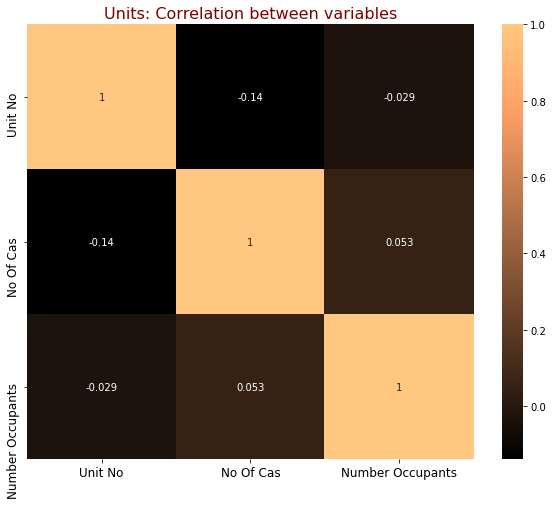

In [75]:
plt.figure(figsize =(10, 8))
sns.heatmap(Units_corr, cmap='copper',annot=True)
plt.title('Units: Correlation between variables' , color = 'maroon' , fontsize = 16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

 ## **Exploring outliers in Units Dataset**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


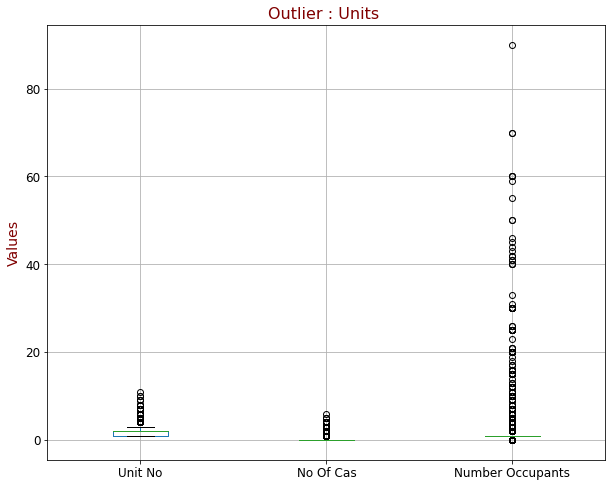

In [76]:
plt.figure(figsize = (10,8))
Units.boxplot()
plt.title('Outlier : Units ' ,color = 'maroon', fontsize=16 )
plt.ylabel('Values' ,color = 'maroon', fontsize=14 )
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## **Exploring the Number of Male and Female Drivers involved in a Crash**

In [77]:
Units.Sex.value_counts()

Male       13999
Female      8832
Unknown     1949
Name: Sex, dtype: int64

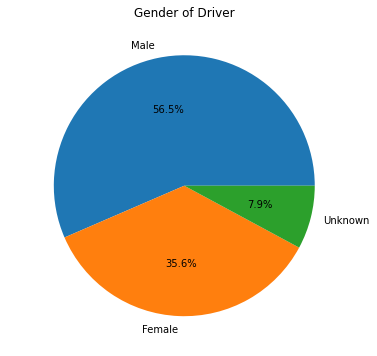

In [78]:
Units.Sex.value_counts().plot(kind='pie',title='Gender of Driver',
                                      autopct='%1.1f%%',labels= ['Male', 'Female' ,'Unknown' ],
                                      ylabel=" " , figsize=(8, 6))

plt.show()

## **Plot displaying the Number of Crash Records based on the Travel Direction**

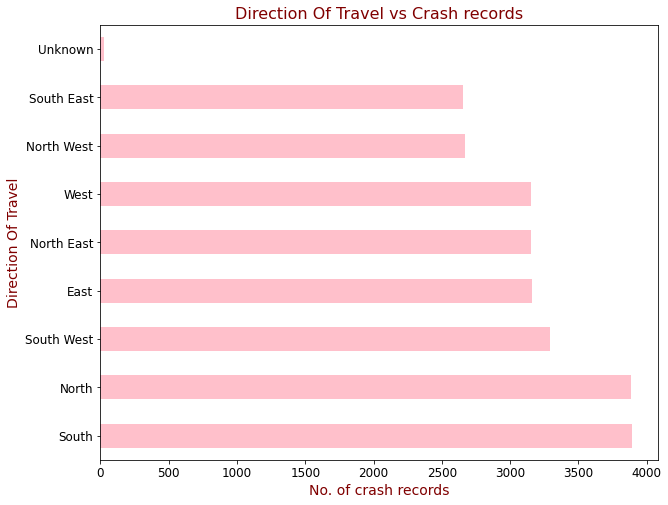

In [79]:
Units['Direction Of Travel'].value_counts().plot(kind='barh' ,color = 'Pink',figsize=(10, 8))
plt.xlabel("No. of crash records", color = 'maroon' , fontsize = 14)
plt.ylabel("Direction Of Travel",  color = 'maroon' , fontsize = 14)
plt.title("Direction Of Travel vs Crash records" , color = 'maroon' , fontsize = 16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## **Plot displaying the Number of Crash Records based on the License Type**

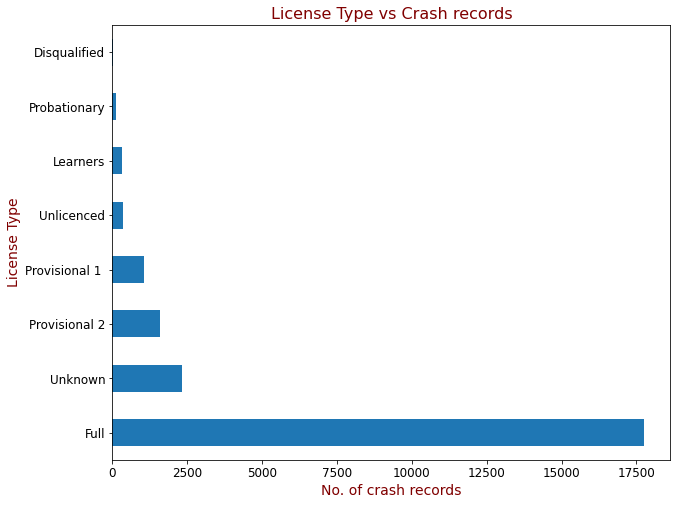

In [80]:
Units['Licence Type'].value_counts().plot(kind='barh' ,figsize=(10, 8))
plt.xlabel("No. of crash records", color = 'maroon' , fontsize = 14)
plt.ylabel("License Type", color = 'maroon' , fontsize = 14)
plt.title("License Type vs Crash records", color = 'maroon' , fontsize = 16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## **Plot displaying the relationship between Number of Casualities and Unit Number**

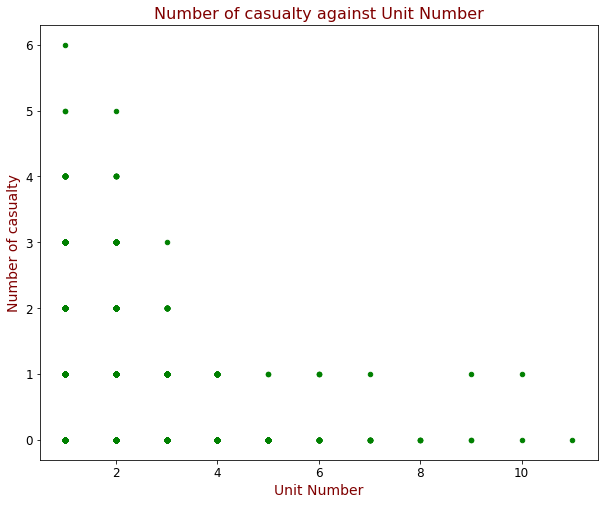

In [81]:
Units.plot(kind = 'scatter', x = 'Unit No', y = 'No Of Cas' ,color = 'green', figsize=(10, 8))
 
plt.xlabel('Unit Number', color = 'maroon' , fontsize = 14)
plt.ylabel('Number of casualty',color = 'maroon' , fontsize = 14)
plt.title('Number of casualty against Unit Number' , color = 'maroon' , fontsize = 16)
 
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

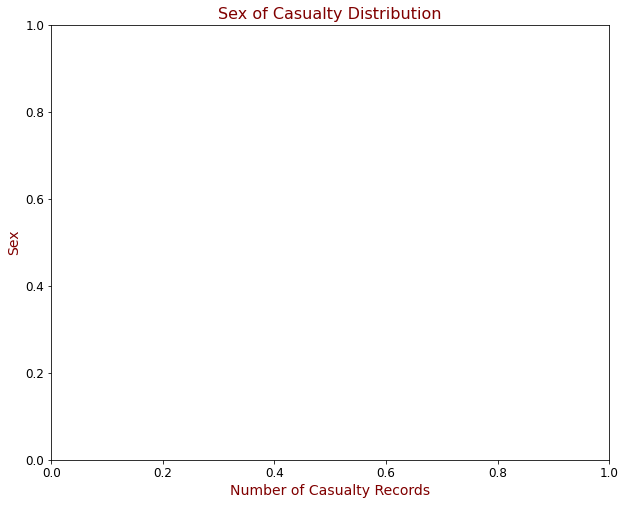

In [82]:
plt.figure(figsize=[10,8])

plt.ylabel("Sex" , color = 'maroon', fontsize=14)
plt.xlabel("Number of Casualty Records" ,color = 'maroon', fontsize=14)
plt.title("Sex of Casualty Distribution" , color = 'maroon', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## **Plot the Towing Record for each Gender**

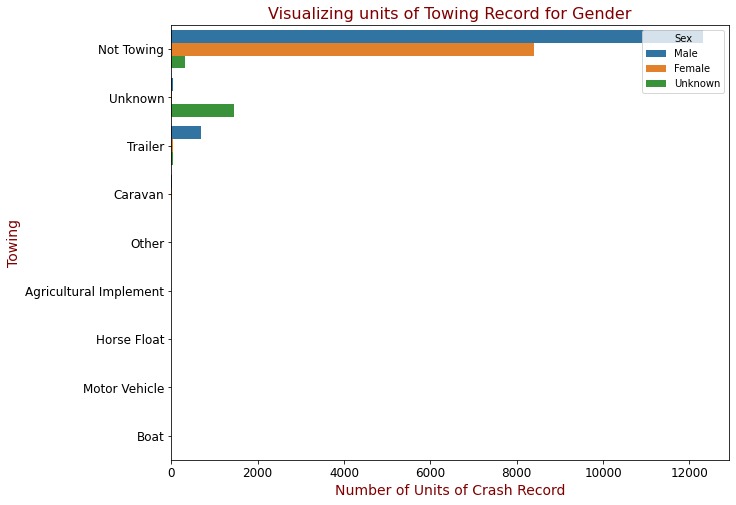

In [83]:
plt.figure(figsize=[10,8])

sns.countplot(data = Units , y = 'Towing' , hue = 'Sex')
plt.xlabel("Number of Units of Crash Record" , color = 'maroon', fontsize=14)
plt.ylabel("Towing" ,color = 'maroon', fontsize=14)
plt.title("Visualizing units of Towing Record for Gender" , color = 'maroon', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()